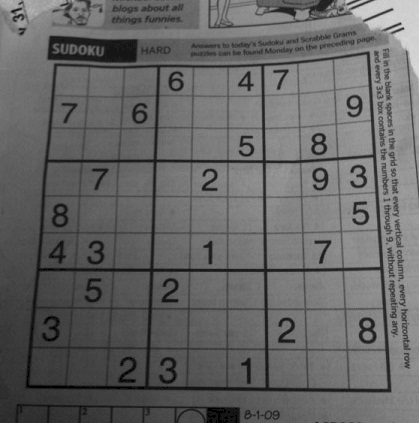

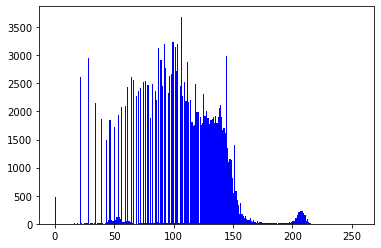

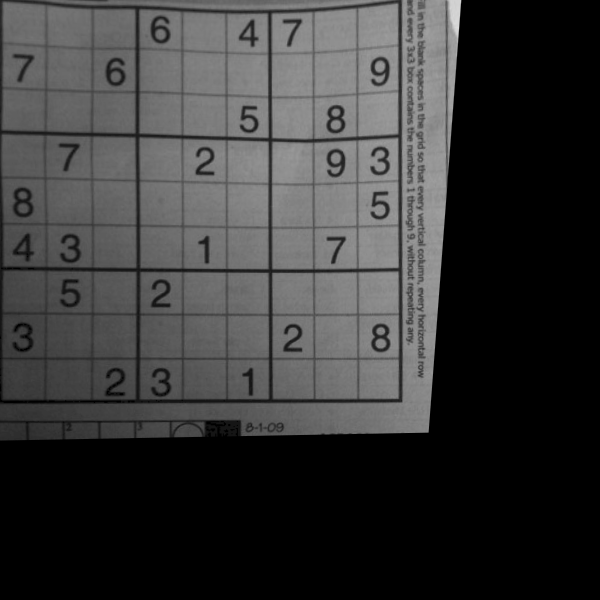

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Read in image and display it
img = cv2.imread('sudoku-original.png', 0)
cv2_imshow(img)

# Make histogram using Matplotlib
plt.hist(img.flatten(), 256, [0,256], color = 'b')
plt.show()

# Define corners of sudoku puzzle
corners = np.float32([[55, 65], [368, 52], [27, 385], [389, 390]])

# Set target corners (a square) for transformation
target_corners = np.float32([[0,0], [400, 0], [0, 400], [400,400]])

#Perrform transformation, warp original image to get results
transform = cv2.getPerspectiveTransform(corners, target_corners)
transformed_img = cv2.warpPerspective(img, transform, (600, 600))

# Show transformed image
cv2_imshow(transformed_img)

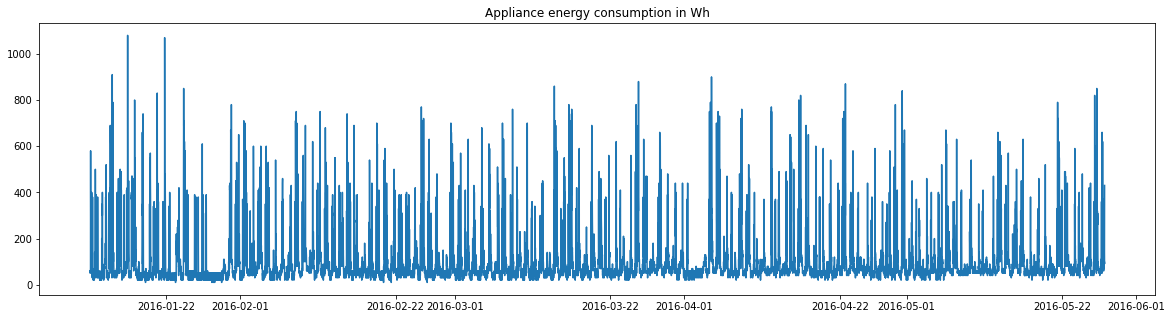

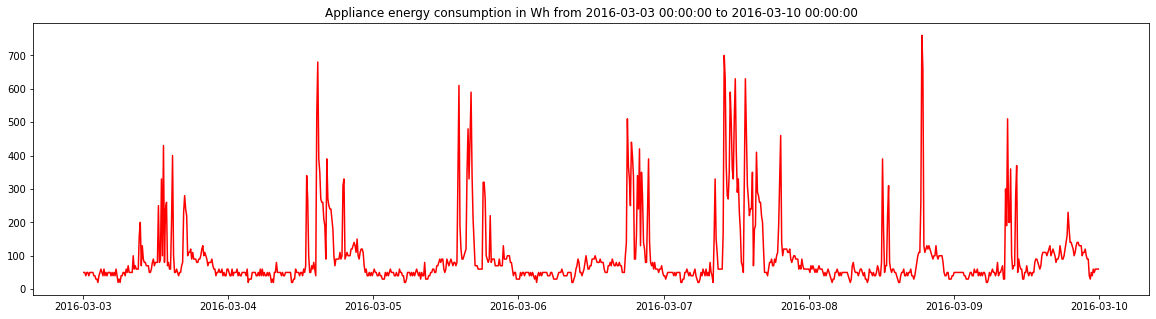

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load in data as a Pandas dataframe
data = pd.read_csv('energydata_complete.csv')

# Convert date column in dataframe from string to datetime object
dates = []
for date in data['date']: dates.append(datetime.strptime(date, '%m/%d/%Y %H:%M'))
data['date'] = np.array(dates)

# 1 - Plot entire energy consumptopm
plt.rcParams['figure.figsize'] = (20,5)
plt.plot(data['date'], data['Appliances'])
plt.title('Appliance energy consumption in Wh')
plt.show()

# 1 - Plot a single week starting with datetime
start_date = datetime(2016, 3, 3)
end_date = start_date + timedelta(days = 7)
week_data = data[(data['date'] > start_date) & (data['date'] < end_date)]
plt.plot(week_data['date'], week_data['Appliances'], color = 'r')
plt.title(f'Appliance energy consumption in Wh from {start_date} to {end_date}')
plt.show()


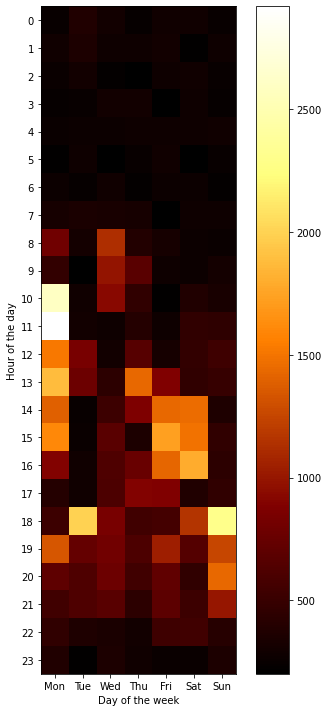

In [ ]:
# 2 - Plot heatmap of hourly consumption for a week (same date range as before)
week_data = week_data.reset_index()
heatmap = np.zeros([24, 7])
for count, date in enumerate(week_data['date']):
  day_wk = date.weekday()
  hr = date.hour
  heatmap[hr, day_wk] += week_data['Appliances'][count]

plt.figure(figsize = (6,10))
plt.imshow(heatmap, cmap='afmhot')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(range(24))
plt.ylabel('Hour of the day')
plt.xlabel('Day of the week')
plt.tight_layout()
plt.colorbar()
plt.show()

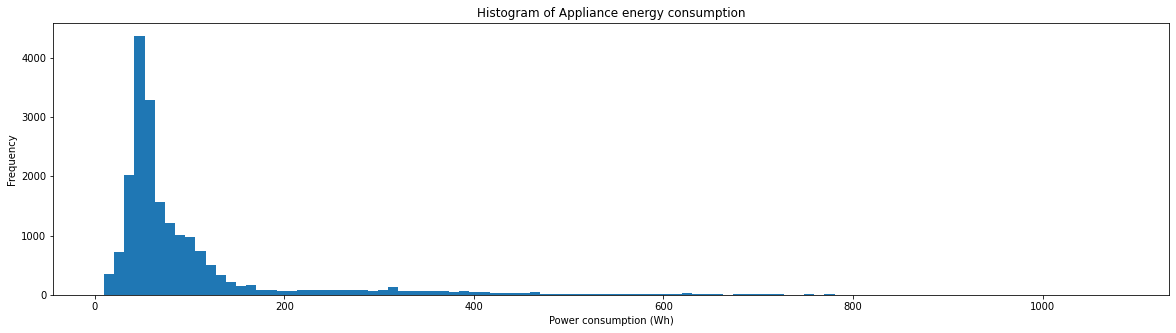

In [ ]:
# 3 - Plot histogram of energy consumption
plt.hist(data['Appliances'], 100)
plt.title("Histogram of Appliance energy consumption")
plt.xlabel('Power consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

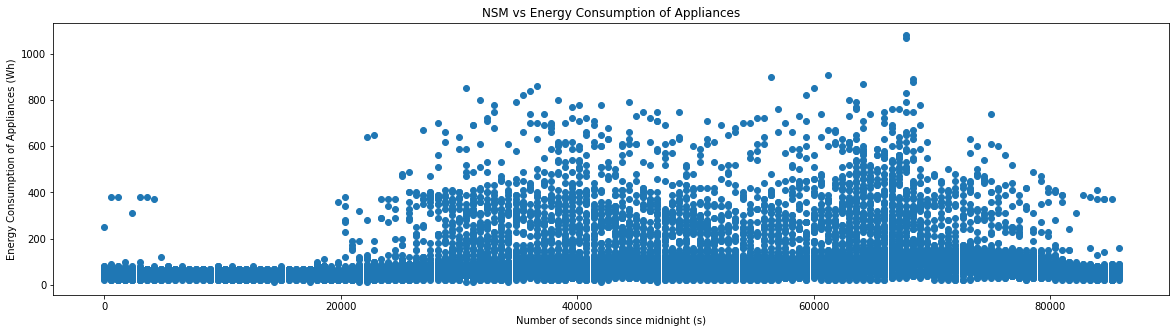

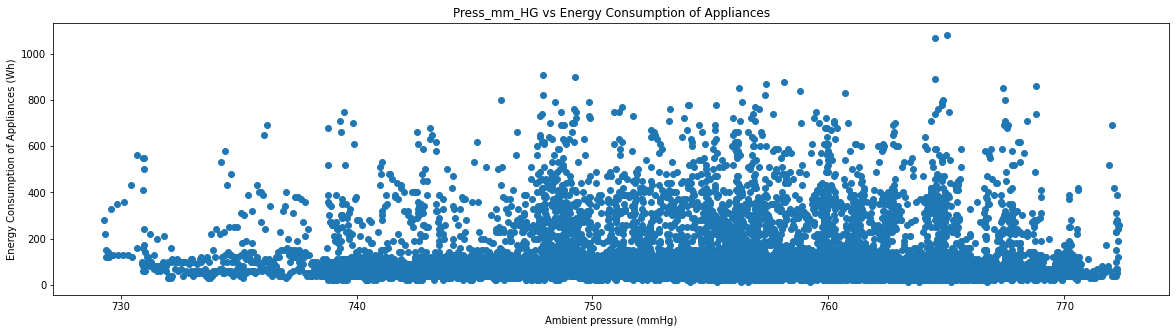

In [ ]:
# 4 - Energy consumption vs NSM
nsm_list = []
for date in data['date']: nsm_list.append((date - date.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds())

data['nsm'] = nsm_list

plt.scatter(data['nsm'], data['Appliances'])
plt.title("NSM vs Energy Consumption of Appliances")
plt.xlabel('Number of seconds since midnight (s)')
plt.ylabel('Energy Consumption of Appliances (Wh)')

plt.show()
plt.scatter(data['Press_mm_hg'], data['Appliances'])
plt.title("Press_mm_HG vs Energy Consumption of Appliances")
plt.xlabel('Ambient pressure (mmHg)')
plt.ylabel('Energy Consumption of Appliances (Wh)')
plt.show()


It looks like there is a positive correlation between number of seconds since midnight and energy consumption of appliances. This continues until about 70,000 seconds, and then declines after that. This seems to correlate with the times of day when people are awake and using appliances.

There is also a positive relationship between ambient pressure and energy consumption, but it seems a bit weaker. It also looks like it tails off after pressure exceeds 765 mmHg, but this is less strong of a relationship than with NSM.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

data = pd.read_csv('airfoil_self_noise.dat', sep='\t', names = ['Frequency', 'AOA', 'Chord len', 'Free Stream vel', 'Suction Side disp Thickness', 'Scaled sound pressure level'])

for header in data.keys():
  print(f'Mean of {header} is {round(data[header].mean(), 3)}')
  print(f'Standard dev of {header} is {round(data[header].std(), 3)}')
  print(f'Median of {header} is {round(data[header].median(), 3)}')
  print(f'Kurtosis of {header} is {round(kurtosis(data[header]), 3)}')
  print(f'Skewness of {header} is {round(skew(data[header]), 3)}')
  print(f'Range of {header} is {round(data[header].max() - data[header].min(), 3)}')
  print('\n')


Mean of Frequency is 2886.381
Standard dev of Frequency is 3152.573
Median of Frequency is 1600.0
Kurtosis of Frequency is 5.686
Skewness of Frequency is 2.135
Range of Frequency is 19800


Mean of AOA is 6.782
Standard dev of AOA is 5.918
Median of AOA is 5.4
Kurtosis of AOA is -0.416
Skewness of AOA is 0.688
Range of AOA is 22.2


Mean of Chord len is 0.137
Standard dev of Chord len is 0.094
Median of Chord len is 0.102
Kurtosis of Chord len is -1.039
Skewness of Chord len is 0.457
Range of Chord len is 0.279


Mean of Free Stream vel is 50.861
Standard dev of Free Stream vel is 15.573
Median of Free Stream vel is 39.6
Kurtosis of Free Stream vel is -1.563
Skewness of Free Stream vel is 0.236
Range of Free Stream vel is 39.6


Mean of Suction Side disp Thickness is 0.011
Standard dev of Suction Side disp Thickness is 0.013
Median of Suction Side disp Thickness is 0.005
Kurtosis of Suction Side disp Thickness is 2.208
Skewness of Suction Side disp Thickness is 1.7
Range of Suction Sid